In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import numpy as np

In [ ]:
class AgentState(TypedDict):
  name: str
  numbers: list[int]
  counter: int

In [25]:
def greeting_node(state: AgentState) -> AgentState:
  """Function to greet the user"""
  state['name'] = f"Hi, {state['name']}"
  state['counter'] = 0
  
  return state

def random_node(state: AgentState) -> AgentState:
  """Function to generate random numbers from 0 to 10"""
  state['numbers'].append(np.random.randint(0,10))
  state['counter'] = state['counter'] + 1
  
  return state

def shouldContinue(state: AgentState) -> str:
  """Function to decide wether to loop or not"""
  if state['counter'] < 5:
    return "loop"
  else:
    return "stop_loop"

In [29]:
graph = StateGraph(state_schema=AgentState)

graph.add_node("greeter",greeting_node)
graph.add_node("random",random_node)

graph.add_edge("greeter","random")

graph.add_conditional_edges(
  source="random",
  path=shouldContinue,
  path_map={
    "loop": "random",
    "stop_loop": END
  }
)

graph.set_entry_point("greeter")

app = graph.compile()

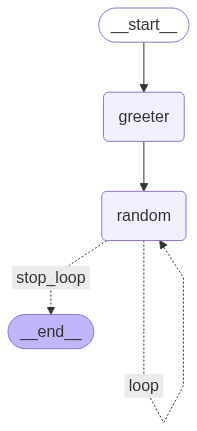

In [30]:
app

In [33]:
result = app.invoke({
  "name": "Shorya",
  "numbers": [],
  "counter": -1
})

In [34]:
result

{'name': 'Hi, Shorya', 'numbers': [5, 0, 6, 7, 5], 'counter': 5}